---
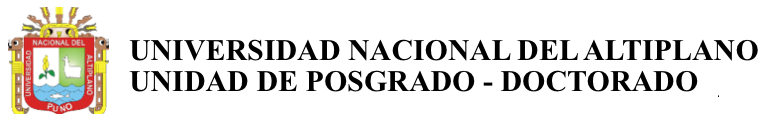
```
TRABAJO ENCARGADO #1
Curso: Analisis de Series de Tiempo
Docente: Dr. Edgar Eloy Carpio Vargas
Presentado por: Harold Coila Villena
```
---




In [23]:
#@title Previamente cargamos la data elegida: RandWalk
import pandas as pd
import matplotlib.pyplot as plt
url="https://dhapstv.com/doctorado/RandWalk.csv"
data=pd.read_csv(url)
X = data.drop("date", axis=1)
y = data["price"]

print(data.head())

HTTPError: ignored

In [3]:
#@title ###1. OBTENER UN MODELO (AR)
# Importar las bibliotecas necesarias

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# Convertir la columna de fechas en formato de fecha
data['date'] = pd.to_datetime(data['date'])

# Configurar la serie temporal como el índice
data.set_index('date', inplace=True)

# Ordenar los datos por fecha
data.sort_index(inplace=True)

# Ajustar un modelo AR(2)
lags = 2
model = AutoReg(data['price'], lags=lags)
results = model.fit()

# Mostrar un resumen del modelo
print(results.summary())

# Realizar predicciones
start = lags
end = len(data) - 1
predictions = results.predict(start=start, end=end)

# Visualizar los datos originales y las predicciones del modelo
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['price'], label='Precio original')
plt.plot(data.index[start:], predictions, label='Predicciones AR', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Modelo AR')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: ignored

<ipython-input-2-f66d013a42ac>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


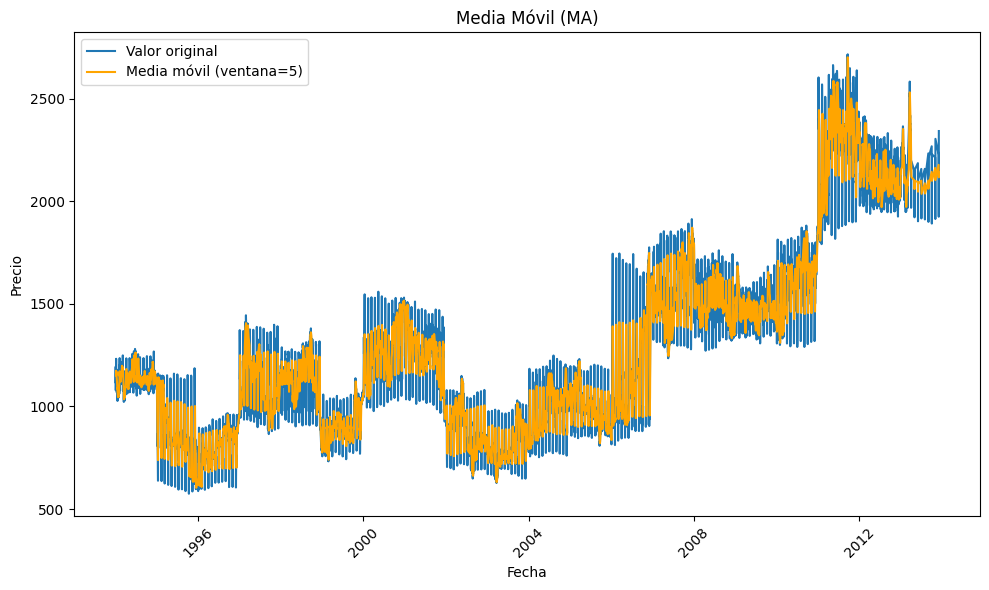

In [ ]:
#@title ###2. OBTENER UN MODELO (MA)

# Convertir la columna de fechas en formato de fecha
data['date'] = pd.to_datetime(data['date'])

# Ordenar los datos por fecha
data.sort_values(by='date', inplace=True)

# Calcular la media móvil con ventana de tamaño 5
window_size = 5
data['ma'] = data['price'].rolling(window=window_size).mean()

# Visualizar los datos originales y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['price'], label='Valor original')
plt.plot(data['date'], data['ma'], label=f'Media móvil (ventana={window_size})', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Media Móvil (MA)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-14-342beef92a7a>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


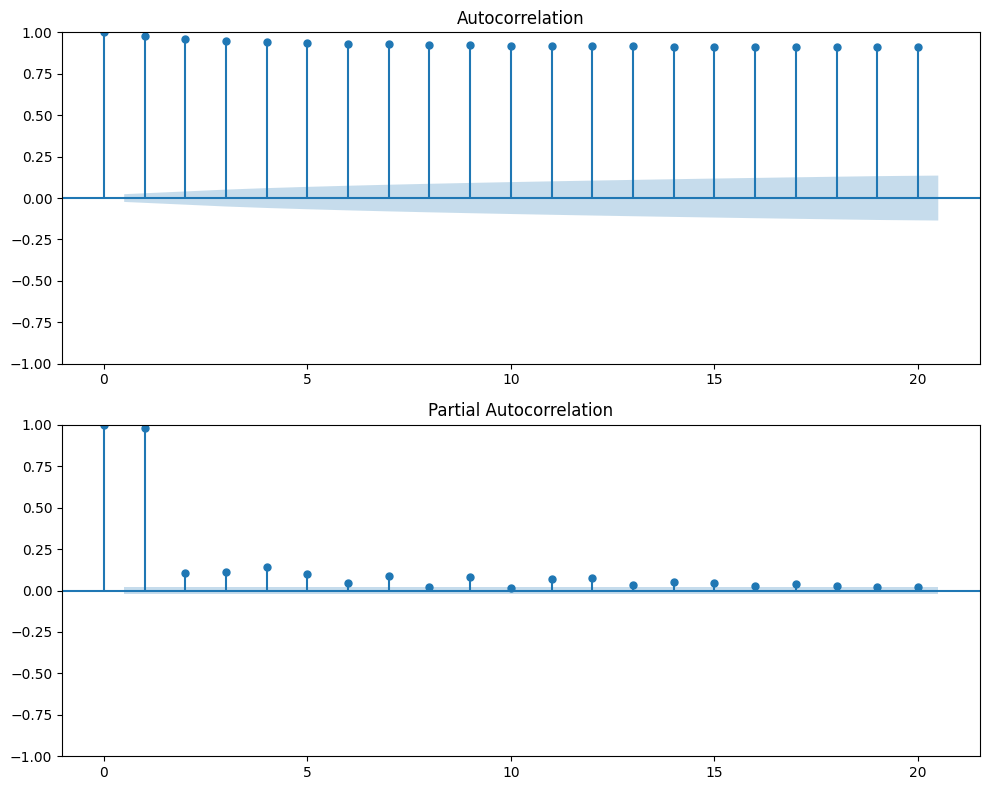

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 7029
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -41317.653
Date:                Wed, 30 Aug 2023   AIC                          82647.306
Time:                        02:02:25   BIC                          82688.453
Sample:                             0   HQIC                         82661.481
                               - 7029                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1269.6509    172.852      7.345      0.000     930.867    1608.434
ar.L1          1.6757      0.012    142.097      0.000       1.653       1.699
ar.L2         -0.6760      0.012    -57.542      0.0

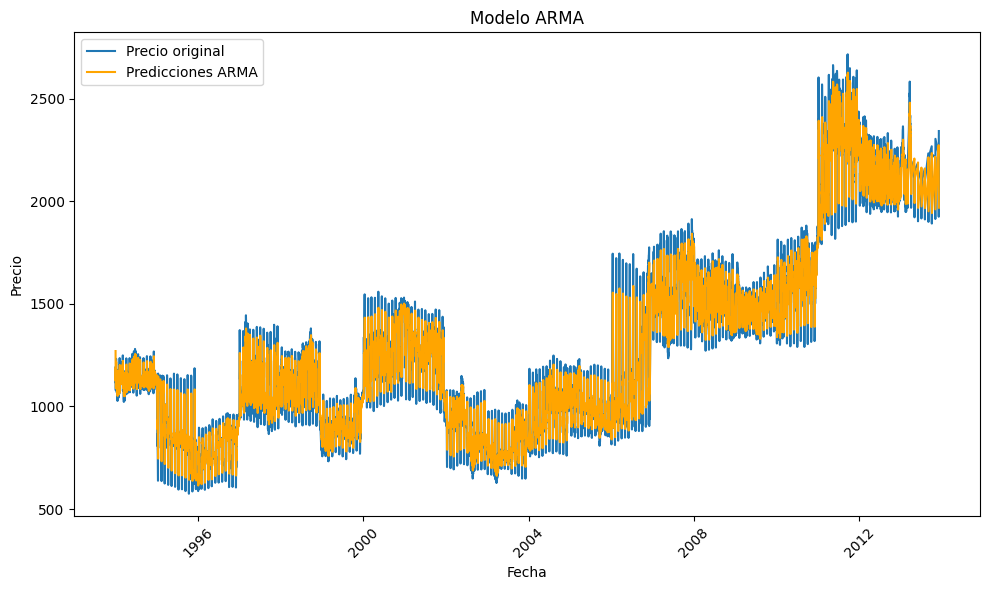

In [ ]:
#@title ###3. OBTENER UN MODELO (ARMA)

# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convertir la columna de fechas en formato de fecha
data['date'] = pd.to_datetime(data['date'])

# Configurar la serie temporal como el índice
data.set_index('date', inplace=True)

# Ordenar los datos por fecha
data.sort_index(inplace=True)

# Visualizar la función de autocorrelación y autocorrelación parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data['price'], lags=20, ax=ax1)
plot_pacf(data['price'], lags=20, ax=ax2)
plt.tight_layout()
plt.show()

# Ajustar un modelo ARMA(2,2)
p = 2
q = 2
model = sm.tsa.ARIMA(data['price'], order=(p, 0, q))
results = model.fit()

# Mostrar un resumen del modelo
print(results.summary())

# Visualizar los datos originales y las predicciones del modelo
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['price'], label='Precio original')
plt.plot(data.index, results.fittedvalues, label='Predicciones ARMA', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Modelo ARMA')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-2-1e0642d25a61>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


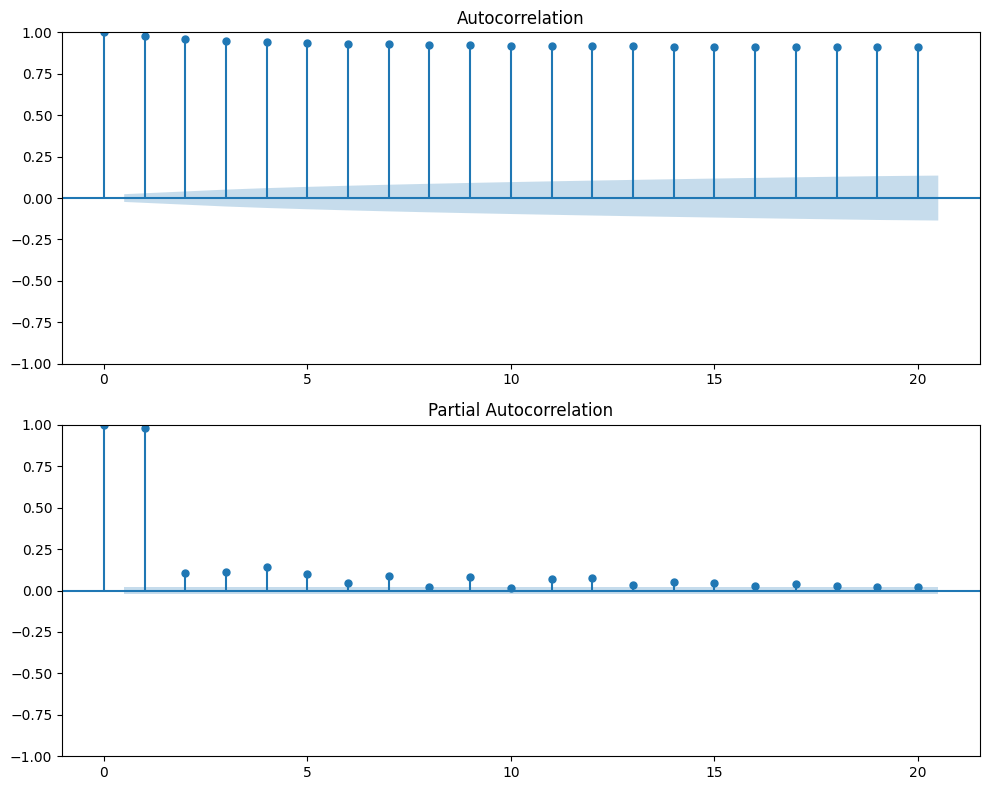

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 7029
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -41291.527
Date:                Wed, 30 Aug 2023   AIC                          82593.054
Time:                        01:48:48   BIC                          82627.342
Sample:                             0   HQIC                         82604.867
                               - 7029                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2684      0.008    -33.346      0.000      -0.284      -0.253
ar.L2          0.6913      0.008     90.289      0.000       0.676       0.706
ma.L1          0.0317      0.005      6.993      0.0

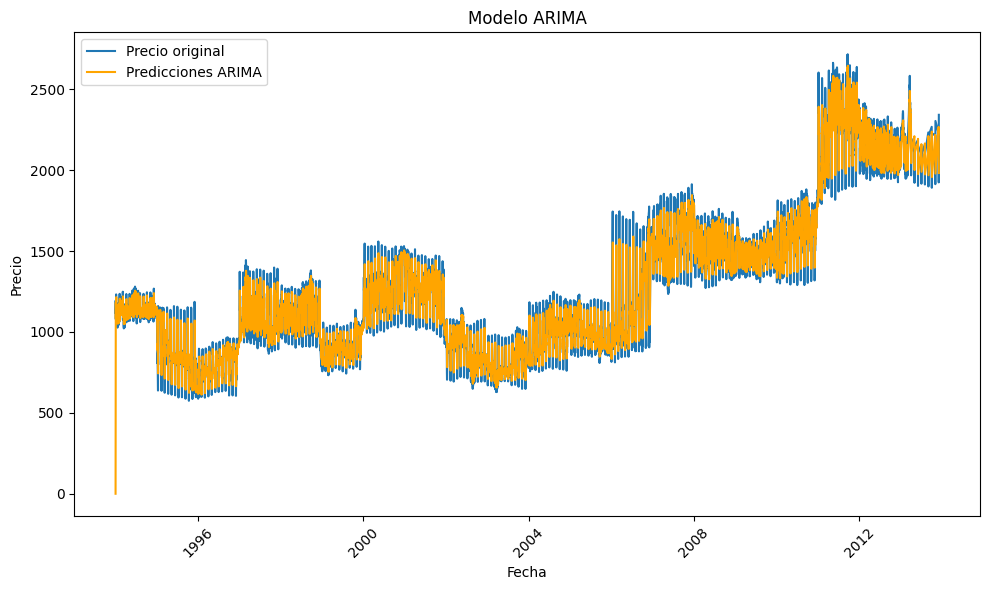

In [ ]:
#@title ###4. OBTENER UN MODELO (ARMA)

# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convertir la columna de fechas en formato de fecha
data['date'] = pd.to_datetime(data['date'])

# Configurar la serie temporal como el índice
data.set_index('date', inplace=True)

# Ordenar los datos por fecha
data.sort_index(inplace=True)

# Visualizar la función de autocorrelación y autocorrelación parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data['price'], lags=20, ax=ax1)
plot_pacf(data['price'], lags=20, ax=ax2)
plt.tight_layout()
plt.show()

# Ajustar un modelo ARIMA(2, 1, 2)
model = ARIMA(data['price'], order=(2, 1, 2))
results = model.fit()

# Mostrar un resumen del modelo
print(results.summary())

# Visualizar los datos originales y las predicciones del modelo
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['price'], label='Precio original')
plt.plot(data.index, results.fittedvalues, label='Predicciones ARIMA', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Modelo ARIMA')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
!jupyter nbconvert --to html SeriesTiempo1.ipynb

[NbConvertApp] WARNING | pattern 'SeriesTiempo1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 